In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
%matplotlib inline
from itertools import repeat
from urllib.request import urlopen
import ssl
import time
import urllib.request

In [2]:
def compile_dynasty(lower, upper):
    seasons = range(lower, upper + 1, 1)
    data = pd.DataFrame()

    for season in seasons:
        stats = pd.read_csv(f'/Users/calebsmith/Library/Mobile Documents/com~apple~CloudDocs/Documents/What If/Dynasty/Rosters/Team {season}.csv')
        stats['Season'] = season
        data = pd.concat([data, stats])

    data.reset_index(inplace = True, drop = True)

    data['State'] = data['Hometown'].str[-2:]
    data['Cmp%'] = round(100*(data['Comp'] / data['Att']), 2)
    data['Yds/Pass'] = round(data['Pass_Yds'] / data['Att'], 2)
    data['Yds/Rush'] = round(data['Rush_Yds'] / data['Rush'], 2)
    data['Yds/Rec'] = round(data['Rec_Yds'] / data['Rec'], 2)
    data['FG%'] = round(100*(data['FGM'] / data['FGA']), 2)

    data['Weight'] = data['Weight'].astype(int)
    data['GP'] = data['GP'].astype(int)
    data['GS'] = data['GS'].astype(int)
    data['Comp'] = data['Comp'].astype(int)
    data['Att'] = data['Att'].astype(int)
    data['Pass_Yds'] = data['Pass_Yds'].astype(int)
    data['Pass_TD'] = data['Pass_TD'].astype(int)
    data['Int_off'] = data['Int_off'].astype(int)
    data['Rush'] = data['Rush'].astype(int)
    data['Rush_Yds'] = data['Rush_Yds'].astype(int)
    data['Rush_TD'] = data['Rush_TD'].astype(int)
    data['Rec'] = data['Rec'].astype(int)
    data['Rec_Yds'] = data['Rec_Yds'].astype(int)
    data['Rec_TD'] = data['Rec_TD'].astype(int)
    data['Tackles'] = data['Tackles'].astype(int)
    data['Sacks'] = data['Sacks'].astype(int)
    data['Int_def'] = data['Int_def'].astype(int)
    data['PD'] = data['PD'].astype(int)
    data['FF'] = data['FF'].astype(int)
    data['BK'] = data['BK'].astype(int)
    data['SFT'] = data['SFT'].astype(int)
    data['FGM'] = data['FGM'].astype(int)
    data['FGA'] = data['FGA'].astype(int)
    data['Long_FG'] = data['Long_FG'].astype(int)
    data['XPM'] = data['XPM'].astype(int)
    data['XPA'] = data['XPA'].astype(int)
    data['Punts'] = data['Punts'].astype(int)
    data['Long_Punt'] = data['Long_Punt'].astype(int)
    data['TB'] = data['TB'].astype(int)
    
    data = data[['Number', 'Name', 'Season', 'Year', 'Position', 'Height', 'Weight', 'Hometown', 'State',
       'Signed By', 'GP', 'GS', 'Comp', 'Att', 'Cmp%', 'Pass_Yds', 'Yds/Pass', 'Pass_TD',
       'Int_off', 'Rush', 'Rush_Yds', 'Yds/Rush', 'Rush_TD', 'Rec', 'Rec_Yds',
       'Yds/Rec', 'Rec_TD', 'Tackles', 'Sacks', 'Int_def', 'PD', 'FF', 'BK',
       'SFT', 'FGM', 'FGA', 'FG%', 'Long_FG', 'XPM', 'XPA', 'Punts', 'Yds/Punt',
       'Long_Punt', 'TB']]
    
    return(data)

In [3]:
stats = compile_dynasty(201, 205)
stats

,Number,Name,Season,Year,Position,Height,Weight,Hometown,State,Signed By,...,FGM,FGA,FG%,Long_FG,XPM,XPA,Punts,Yds/Punt,Long_Punt,TB
0,1,Rafael Chambers,201,Sr.,RB,"5'9""",205,"New Brighton, MN",MN,jvstater1,...,0,0,NaN,0,0,0,0,0.0,0,0
1,2,George Fisher,201,So.*,QB,"6'0""",196,"Manchester, NH",NH,jvstater1,...,0,0,NaN,0,0,0,0,0.0,0,0
2,3,Charles Wilson,201,Fr.,DB,"5'11""",200,"Woodbridge, VA",VA,jvstater1,...,0,0,NaN,0,0,0,0,0.0,0,0
3,4,Arthur Tillman,201,Jr.,DB,"6'0""",205,"Pittsburgh, PA",PA,jvstater1,...,0,0,NaN,0,0,0,0,0.0,0,0
4,5,Samuel Gibbs,201,Jr.,LB,"6'3""",209,"Montross, VA",VA,jvstater1,...,0,0,NaN,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,88,Jason Mills,205,So.,DL,"6'6""",317,"Moweaqua, IL",IL,jvstater1,...,0,0,NaN,0,0,0,0,0.0,0,0
246,90,George Williams,205,So.*,LB,"6'4""",242,"Ballston Spa, NY",NY,jvstater1,...,0,0,NaN,0,0,0,0,0.0,0,0
247,94,Steven Fowler,205,Sr.,DL,"6'8""",315,"Dayton, OH",OH,jvstater1,...,0,0,NaN,0,0,0,0,0.0,0,0
248,98,Richard Valdez,205,So.,DL,"6'4""",310,"Waldorf, MD",MD,jvstater1,...,0,0,NaN,0,0,0,0,0.0,0,0


In [4]:
stats_info = stats[['Number', 'Name', 'Position', 'State']].copy()
stats_info.drop_duplicates(inplace = True)
stats_info.reset_index(drop = True, inplace = True)
stats_info

,Number,Name,Position,State
0,1,Rafael Chambers,RB,MN
1,2,George Fisher,QB,NH
2,3,Charles Wilson,DB,VA
3,4,Arthur Tillman,DB,PA
4,5,Samuel Gibbs,LB,VA
...,...,...,...,...
95,50,Douglas Miller,LB,CT
96,52,Joshua Preston,OL,NJ
97,72,Kenneth Carlisle,OL,WI
98,87,Richard Goins,WR,PA


In [5]:
stats_info.groupby('State').count()[['Name']].sort_values(by = 'Name', ascending = False)

,Name
State,
PA,21
OH,14
NY,9
VA,8
IL,5
IN,5
MA,5
NJ,4
WI,3


# Passing

In [6]:
passer = stats['Att'] != 0
passing = stats[passer]
passing = passing[['Number', 'Name', 'Season', 'Year', 'Position', 'GP', 'GS', 'Comp', 'Att', 'Cmp%', 'Pass_Yds', 'Yds/Pass', 'Pass_TD', 'Int_off']]
passing.rename(columns = {'Pass_Yds': 'Yds', 'Pass_TD': 'TD', 'Int_off': 'INT'}, inplace = True)
passing['Passer Rating'] = round(( (passing['Cmp%']-30)*0.05 + (passing['Yds/Pass']-3)*0.25 + (passing['TD']/passing['Att'])*20 - (passing['INT']/passing['Att'])*25 +2.375 ) * 100/6, 1)
passing.sort_values('Yds', ascending = False, inplace = True)
passing.reset_index(inplace = True, drop = True)
passing

,Number,Name,Season,Year,Position,GP,GS,Comp,Att,Cmp%,Yds,Yds/Pass,TD,INT,Passer Rating
0,10,Scott Young,204,Jr.*,QB,15,15,406,648,62.65,4639,7.16,35,7,97.6
1,2,George Fisher,202,Jr.*,QB,15,15,296,507,58.38,3019,5.95,18,1,86.5
2,2,George Fisher,203,Sr.*,QB,16,12,200,328,60.98,2392,7.29,17,0,100.6
3,6,Paul Heard,201,Sr.,QB,14,14,207,365,56.71,2114,5.79,6,0,78.9
4,10,Scott Young,205,Sr.*,QB,15,9,224,353,63.46,2105,5.96,15,1,92.8
5,10,Scott Young,203,So.*,QB,15,12,192,327,58.72,1990,6.09,15,2,89.1
6,5,Timothy Thomas,205,Fr.*,QB,15,14,112,189,59.26,1314,6.95,9,1,94.1
7,2,George Fisher,201,So.*,QB,14,7,105,174,60.34,1145,6.58,4,2,82.7
8,10,Scott Young,202,Fr.*,QB,14,5,61,114,53.51,604,5.30,4,3,69.5
9,19,Luis Barrett,204,Fr.,QB,15,4,19,33,57.58,151,4.58,3,0,99.5


In [7]:
career_pass = passing.groupby('Name').sum()
career_pass.drop(columns = ['Number', 'Season', 'Year', 'Position'], inplace = True)
career_pass['Cmp%'] = round(100*(career_pass['Comp'] / career_pass['Att']), 2)
career_pass['Yds/Pass'] = round(career_pass['Yds'] / career_pass['Att'], 2)
career_pass['Passer Rating'] = round(( (career_pass['Cmp%']-30)*0.05 + (career_pass['Yds/Pass']-3)*0.25 + (career_pass['TD']/career_pass['Att'])*20 - (career_pass['INT']/career_pass['Att'])*25 +2.375 ) * 100/6, 1)
career_pass.sort_values('Yds', ascending = False, inplace = True)
career_pass = pd.merge(career_pass, stats_info, on = 'Name', how = 'left')
career_pass['Yds/Game'] = round(career_pass['Yds']/career_pass['GP'], 1)
career_pass = career_pass[['Number', 'Name', 'Position', 'GP', 'GS', 'Comp', 'Att', 'Cmp%', 'Yds', 'Yds/Pass', 'Yds/Game', 'TD', 'INT', 'Passer Rating']]
career_pass

,Number,Name,Position,GP,GS,Comp,Att,Cmp%,Yds,Yds/Pass,Yds/Game,TD,INT,Passer Rating
0,10,Scott Young,QB,59,41,883,1442,61.23,9338,6.48,158.3,69,13,92.3
1,2,George Fisher,QB,45,34,601,1009,59.56,6556,6.50,145.7,39,3,90.4
2,6,Paul Heard,QB,14,14,207,365,56.71,2114,5.79,151.0,6,0,78.9
3,5,Timothy Thomas,QB,15,14,112,189,59.26,1314,6.95,87.6,9,1,94.1
4,19,Luis Barrett,QB,15,4,19,33,57.58,151,4.58,10.1,3,0,99.5


# Rushing

In [8]:
rusher = stats['Rush'] != 0
rushing = stats[rusher]
rushing = rushing[['Number', 'Name', 'Season', 'Year', 'Position', 'GP', 'GS', 'Rush', 'Rush_Yds', 'Yds/Rush', 'Rush_TD']]
rushing.rename(columns = {'Rush_Yds': 'Yds', 'Rush_TD': 'TD'}, inplace = True)
rushing.sort_values('Yds', ascending = False, inplace = True)
rushing.reset_index(drop = True, inplace = True)
rushing

,Number,Name,Season,Year,Position,GP,GS,Rush,Yds,Yds/Rush,TD
0,32,Rodney Shepherd,202,So.,RB,15,15,296,1659,5.60,12
1,32,Rodney Shepherd,203,Jr.,RB,16,16,284,1569,5.52,10
2,1,Rafael Chambers,201,Sr.,RB,14,14,293,1528,5.22,7
3,24,William Rios,205,Jr.*,RB,15,10,216,1264,5.85,18
4,11,Cory Christie,205,Sr.*,RB,15,11,249,1249,5.02,19
5,11,Cory Christie,204,Jr.*,RB,15,7,224,1103,4.92,20
6,24,William Rios,204,So.*,RB,15,7,161,929,5.77,11
7,11,Cory Christie,202,Fr.*,RB,15,4,143,797,5.57,21
8,11,Cory Christie,203,So.*,RB,16,6,166,741,4.46,25
9,30,James Little,205,So.,RB,15,15,107,608,5.68,6


In [9]:
career_rush = rushing.groupby('Name').sum()
career_rush.drop(columns = ['Number', 'Season', 'Year', 'Position'], inplace = True)
career_rush['Yds/Rush'] = round(career_rush['Yds'] / career_rush['Rush'], 2)
career_rush.sort_values('Yds', ascending = False, inplace = True)
career_rush = pd.merge(career_rush, stats_info, on = 'Name', how = 'left')
career_rush['Yds/Game'] = round(career_rush['Yds']/career_rush['GP'], 1)
career_rush = career_rush[['Number', 'Name', 'Position', 'GP', 'GS', 'Rush', 'Yds', 'Yds/Rush', 'TD', 'Yds/Game']]
career_rush = career_rush[career_rush.Position != 'TE']
career_rush

,Number,Name,Position,GP,GS,Rush,Yds,Yds/Rush,TD,Yds/Game
0,32,Rodney Shepherd,RB,60,50,752,3973,5.28,40,66.2
1,11,Cory Christie,RB,61,28,782,3890,4.97,85,63.8
2,24,William Rios,RB,43,18,391,2256,5.77,31,52.5
3,1,Rafael Chambers,RB,14,14,293,1528,5.22,7,109.1
4,30,James Little,RB,28,15,114,636,5.58,8,22.7
5,20,Frank Turner,RB,24,0,47,202,4.30,6,8.4
6,21,Charles Fuller,RB,14,0,61,150,2.46,18,10.7
8,6,Paul Heard,QB,14,14,26,56,2.15,0,4.0
9,5,Timothy Thomas,QB,15,14,15,44,2.93,0,2.9
10,10,Scott Young,QB,59,41,103,1,0.01,2,0.0


# Receiving

In [10]:
receiver = stats['Rec'] != 0
receiving = stats[receiver]
receiving = receiving[['Number', 'Name', 'Season', 'Year', 'Position', 'GP', 'GS', 'Rec', 'Rec_Yds', 'Yds/Rec', 'Rec_TD']]
receiving.rename(columns = {'Rec_Yds': 'Yds', 'Rec_TD': 'TD'}, inplace = True)
receiving.sort_values(['Rec', 'Yds'], ascending = [False, False], inplace = True)
receiving.reset_index(inplace = True, drop = True)
receiving

,Number,Name,Season,Year,Position,GP,GS,Rec,Yds,Yds/Rec,TD
0,82,Ruben Davis,203,Jr.*,WR,16,16,103,1077,10.46,6
1,82,Ruben Davis,202,So.*,WR,15,15,87,942,10.83,5
2,81,Shawn Smith,205,Sr.,WR,15,15,82,939,11.45,7
3,81,Shawn Smith,203,So.,WR,16,16,73,743,10.18,5
4,81,Shawn Smith,204,Jr.,WR,15,15,72,842,11.69,6
5,82,Ruben Davis,204,Sr.*,WR,15,13,71,807,11.37,7
6,9,Frederick Redmond,205,Jr.,WR,15,14,70,719,10.27,6
7,1,Jonathan Schmidt,205,Fr.,WR,15,15,68,640,9.41,4
8,14,Robert Green,202,Jr.,WR,15,15,65,745,11.46,4
9,14,Robert Green,203,Sr.,WR,16,14,60,683,11.38,3


In [11]:
career_rec = receiving.groupby('Name').sum()
career_rec.drop(columns = ['Number', 'Season', 'Year', 'Position'], inplace = True)
career_rec['Yds/Rec'] = round(career_rec['Yds'] / career_rec['Rec'], 2)
career_rec.sort_values(['Rec', 'Yds'], ascending = [False, False], inplace = True)
career_rec = pd.merge(career_rec, stats_info, on = 'Name', how = 'left')
career_rec['Rec/Game'] = round(career_rec['Rec']/career_rec['GP'], 1)
career_rec['Yds/Game'] = round(career_rec['Yds']/career_rec['GP'], 1)
career_rec = career_rec[['Number', 'Name', 'GP', 'GS', 'Position', 'Rec', 'Yds', 'Yds/Rec', 'Rec/Game', 'Yds/Game', 'TD']]
career_rec

,Number,Name,GP,GS,Position,Rec,Yds,Yds/Rec,Rec/Game,Yds/Game,TD
0,82,Ruben Davis,60,53,WR,292,3150,10.79,4.9,52.5,18
1,81,Shawn Smith,61,54,WR,259,2815,10.87,4.2,46.1,20
2,14,Robert Green,45,43,WR,171,1892,11.06,3.8,42.0,8
3,9,Frederick Redmond,45,26,WR,139,1431,10.29,3.1,31.8,13
4,17,Jason Lara,61,26,WR,119,1339,11.25,2.0,22.0,14
5,8,William Howard,45,44,TE,118,1415,11.99,2.6,31.4,7
6,32,Rodney Shepherd,60,50,RB,97,900,9.28,1.6,15.0,8
7,86,Robert Wright,56,36,TE,95,1070,11.26,1.7,19.1,5
8,89,Thomas Henry,59,29,TE,76,1073,14.12,1.3,18.2,9
9,1,Jonathan Schmidt,15,15,WR,68,640,9.41,4.5,42.7,4


<Axes: xlabel='Name'>

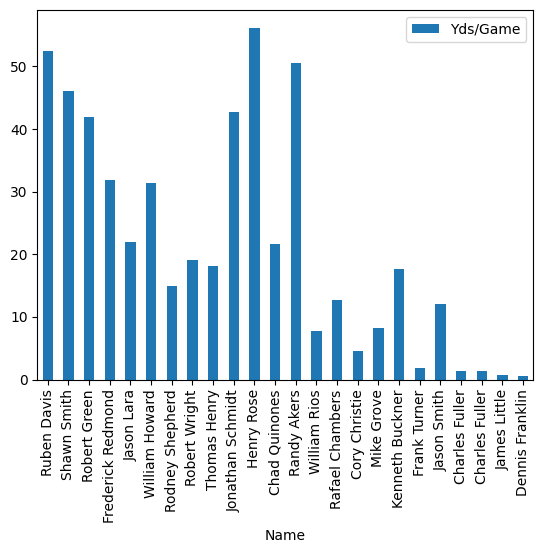

In [12]:
career_rec.plot.bar(x = 'Name', y = 'Yds/Game')

# Defense

In [13]:
defender = stats['Tackles'] != 0
defense = stats[defender]
defense = defense[['Number', 'Name', 'Season', 'Year', 'Position', 'GP', 'GS', 'Tackles', 'Sacks', 'Int_def', 'PD', 'FF', 'BK', 'SFT']]
defense.rename(columns = {'Int_def': 'INT'}, inplace = True)
defense.sort_values('Tackles', ascending = False, inplace = True)
defense.reset_index(inplace = True, drop = True)
defense

,Number,Name,Season,Year,Position,GP,GS,Tackles,Sacks,INT,PD,FF,BK,SFT
0,25,Jeremy Marshall,203,So.*,DL,16,16,116,7,0,0,5,0,1
1,5,Samuel Gibbs,202,Sr.,LB,15,15,106,3,5,14,0,0,0
2,40,Gary Roper,203,Jr.*,LB,16,16,97,3,3,9,2,0,0
3,26,Charles O'Brien,203,Sr.,DB,16,15,84,0,5,9,0,0,0
4,9,Edward Harper,201,Sr.,LB,14,14,78,8,0,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,27,Roy Winter,205,Fr.,DB,9,0,2,0,0,0,0,0,0
106,37,Harvey Garza,202,Fr.,DB,10,0,2,0,0,2,0,0,0
107,35,Mark Adams,201,Fr.,LB,10,0,1,0,0,0,0,0,0
108,37,Harvey Garza,204,Jr.,DB,11,0,1,0,0,2,0,0,0


In [26]:
defense.sort_values('INT', ascending = False).head(10)

,Number,Name,Season,Year,Position,GP,GS,Tackles,Sacks,INT,PD,FF,BK,SFT
17,15,Dennis Marshall,204,So.*,DB,15,15,63,0,9,18,1,0,0
14,15,Dennis Marshall,205,Jr.*,DB,15,15,67,0,6,15,0,0,0
40,40,Gary Roper,204,Sr.*,LB,14,12,47,3,5,3,0,0,0
1,5,Samuel Gibbs,202,Sr.,LB,15,15,106,3,5,14,0,0,0
3,26,Charles O'Brien,203,Sr.,DB,16,15,84,0,5,9,0,0,0
5,3,Charles Wilson,203,Jr.,DB,16,16,78,0,4,2,1,0,0
10,13,Paul Peacock,201,Sr.,DB,14,14,70,0,4,11,1,0,0
54,3,Charles Wilson,204,Sr.,DB,15,12,35,0,3,7,0,0,0
30,28,Michael Wolfe,205,Sr.,DB,15,12,57,0,3,7,0,0,0
2,40,Gary Roper,203,Jr.*,LB,16,16,97,3,3,9,2,0,0


In [15]:
def_by_pos = defense.groupby('Position').sum()[['Tackles', 'Sacks', 'INT', 'PD', 'FF', 'BK', 'SFT']]
def_by_pos

,Tackles,Sacks,INT,PD,FF,BK,SFT
Position,,,,,,,
DB,1374,1,70,226,15,0,0
DL,1083,86,0,0,27,0,4
LB,1621,74,38,145,19,0,2


In [16]:
career_def = defense.groupby('Name').sum()
career_def.drop(columns = ['Number', 'Season', 'Year', 'Position'], inplace = True)
career_def.sort_values('Tackles', ascending = False, inplace = True)
career_def = pd.merge(career_def, stats_info, on = 'Name', how = 'left')
career_def['Tackles/Game'] = round(career_def['Tackles'] / career_def['GP'], 2)
career_def['Sacks/Game'] = round(career_def['Sacks'] / career_def['GP'], 2)
career_def['INT/Game'] = round(career_def['INT'] / career_def['GP'], 2)
career_def = career_def[['Number', 'Name', 'Position', 'GP', 'GS', 'Tackles', 'Tackles/Game', 'Sacks', 'Sacks/Game', 'INT', 'INT/Game', 'PD', 'FF', 'BK', 'SFT']]
career_def

,Number,Name,Position,GP,GS,Tackles,Tackles/Game,Sacks,Sacks/Game,INT,INT/Game,PD,FF,BK,SFT
0,25,Jeremy Marshall,DL,61,56,305,5.00,22,0.36,0,0.00,0,5,0,2
1,40,Gary Roper,LB,57,47,232,4.07,10,0.18,8,0.14,17,3,0,0
2,26,Charles O'Brien,DB,45,44,210,4.67,1,0.02,8,0.18,28,1,0,0
3,28,Michael Wolfe,DB,61,51,198,3.25,0,0.00,5,0.08,34,2,0,0
4,3,Charles Wilson,DB,60,50,193,3.22,0,0.00,10,0.17,18,2,0,0
5,5,Samuel Gibbs,LB,29,29,176,6.07,3,0.10,6,0.21,25,1,0,0
6,13,William Burns,LB,46,43,175,3.80,7,0.15,3,0.07,14,2,0,0
7,15,Dennis Marshall,DB,46,45,164,3.57,0,0.00,17,0.37,40,1,0,0
8,6,Donald Bond,LB,46,45,163,3.54,8,0.17,1,0.02,14,3,0,0
9,43,Donald Brantley,DB,61,46,147,2.41,0,0.00,6,0.10,35,1,0,0


In [17]:
career_def.sort_values('Tackles', ascending = False).head(10)

,Number,Name,Position,GP,GS,Tackles,Tackles/Game,Sacks,Sacks/Game,INT,INT/Game,PD,FF,BK,SFT
0,25,Jeremy Marshall,DL,61,56,305,5.00,22,0.36,0,0.00,0,5,0,2
1,40,Gary Roper,LB,57,47,232,4.07,10,0.18,8,0.14,17,3,0,0
2,26,Charles O'Brien,DB,45,44,210,4.67,1,0.02,8,0.18,28,1,0,0
3,28,Michael Wolfe,DB,61,51,198,3.25,0,0.00,5,0.08,34,2,0,0
4,3,Charles Wilson,DB,60,50,193,3.22,0,0.00,10,0.17,18,2,0,0
5,5,Samuel Gibbs,LB,29,29,176,6.07,3,0.10,6,0.21,25,1,0,0
6,13,William Burns,LB,46,43,175,3.80,7,0.15,3,0.07,14,2,0,0
7,15,Dennis Marshall,DB,46,45,164,3.57,0,0.00,17,0.37,40,1,0,0
8,6,Donald Bond,LB,46,45,163,3.54,8,0.17,1,0.02,14,3,0,0
9,43,Donald Brantley,DB,61,46,147,2.41,0,0.00,6,0.10,35,1,0,0


In [23]:
career_def[career_def['INT'] >= 5].sort_values('INT', ascending = False)

,Number,Name,Position,GP,GS,Tackles,Tackles/Game,Sacks,Sacks/Game,INT,INT/Game,PD,FF,BK,SFT
7,15,Dennis Marshall,DB,46,45,164,3.57,0,0.00,17,0.37,40,1,0,0
4,3,Charles Wilson,DB,60,50,193,3.22,0,0.00,10,0.17,18,2,0,0
1,40,Gary Roper,LB,57,47,232,4.07,10,0.18,8,0.14,17,3,0,0
2,26,Charles O'Brien,DB,45,44,210,4.67,1,0.02,8,0.18,28,1,0,0
5,5,Samuel Gibbs,LB,29,29,176,6.07,3,0.10,6,0.21,25,1,0,0
9,43,Donald Brantley,DB,61,46,147,2.41,0,0.00,6,0.10,35,1,0,0
13,4,Arthur Tillman,DB,29,29,119,4.10,0,0.00,6,0.21,15,1,0,0
3,28,Michael Wolfe,DB,61,51,198,3.25,0,0.00,5,0.08,34,2,0,0
10,51,Robert Rodriguez,LB,60,40,139,2.32,8,0.13,5,0.08,9,3,0,0
16,56,Jeremy Herrera,LB,29,29,104,3.59,4,0.14,5,0.17,8,1,0,0


In [24]:
career_def[career_def['Sacks'] >= 5].sort_values('Sacks', ascending = False)

,Number,Name,Position,GP,GS,Tackles,Tackles/Game,Sacks,Sacks/Game,INT,INT/Game,PD,FF,BK,SFT
0,25,Jeremy Marshall,DL,61,56,305,5.00,22,0.36,0,0.00,0,5,0,2
12,88,Jason Mills,DL,30,30,120,4.00,14,0.47,0,0.00,0,3,0,1
1,40,Gary Roper,LB,57,47,232,4.07,10,0.18,8,0.14,17,3,0,0
14,57,Charles Morgan,DL,46,37,114,2.48,10,0.22,0,0.00,0,3,0,0
8,6,Donald Bond,LB,46,45,163,3.54,8,0.17,1,0.02,14,3,0,0
10,51,Robert Rodriguez,LB,60,40,139,2.32,8,0.13,5,0.08,9,3,0,0
18,55,Steven Medina,DL,29,24,100,3.45,8,0.28,0,0.00,0,2,0,0
19,9,Edward Harper,LB,14,14,78,5.57,8,0.57,0,0.00,3,2,0,1
6,13,William Burns,LB,46,43,175,3.80,7,0.15,3,0.07,14,2,0,0
26,92,Joe Cantu,DL,44,8,51,1.16,7,0.16,0,0.00,0,1,0,0


# Kicking

In [19]:
kicker = stats['FGA'] != 0
kicking = stats[kicker]
kicking = kicking[['Number', 'Name', 'Season', 'Year', 'Position', 'GP', 'GS', 'FGM', 'FGA', 'FG%', 'Long_FG', 'XPM', 'XPA']]
kicking['XP%'] = 100*(kicking['XPM'] / kicking['XPA'])
kicking['Points'] = kicking['XPM'] + 3*kicking['FGM']
kicking.sort_values('Points', ascending = False, inplace = True)
kicking.reset_index(inplace = True, drop = True)
kicking

,Number,Name,Season,Year,Position,GP,GS,FGM,FGA,FG%,Long_FG,XPM,XPA,XP%,Points
0,16,Anthony Thompson,203,Sr.,K,16,16,41,44,93.18,50,76,76,100.0,199
1,4,Albert Shepherd,205,Fr.,K,15,15,40,51,78.43,55,70,70,100.0,190
2,16,Anthony Thompson,202,Jr.,K,15,15,35,38,92.11,50,61,61,100.0,166
3,12,Robert Dalton,204,So.,P,15,15,22,26,84.62,41,86,86,100.0,152
4,16,Anthony Thompson,201,So.,K,14,14,30,32,93.75,48,51,51,100.0,141


In [20]:
career_kick = kicking.groupby('Name').sum()
career_kick.drop(columns = ['Number', 'Season', 'Year', 'Position'], inplace = True)
career_kick = pd.merge(career_kick, stats_info, on = 'Name', how = 'left')
career_kick['FG%'] = round(career_kick['FGM'] / career_kick['FGA'], 2) * 100
career_kick['XP%'] = round(career_kick['XPM'] / career_kick['XPA'], 2) * 100
career_kick = career_kick[['Number', 'Name', 'Position', 'GP', 'GS', 'FGM', 'FGA', 'FG%', 'Long_FG', 'XPM', 'XPA', 'XP%', 'Points']]
career_kick

,Number,Name,Position,GP,GS,FGM,FGA,FG%,Long_FG,XPM,XPA,XP%,Points
0,4,Albert Shepherd,K,15,15,40,51,78.0,55,70,70,100.0,190
1,16,Anthony Thompson,K,45,45,106,114,93.0,148,188,188,100.0,506
2,12,Robert Dalton,P,15,15,22,26,85.0,41,86,86,100.0,152


# Punting

In [21]:
punter = stats['Punts'] != 0
punting = stats[punter].copy()
punting['Yds'] = round(punting['Punts'] * punting['Yds/Punt'], 2)
punting = punting[['Number', 'Name', 'Season', 'Year', 'Position', 'GP', 'GS', 'Punts', 'Yds', 'Yds/Punt', 'Long_Punt', 'TB']]
punting.sort_values('Yds/Punt', ascending = False, inplace = True)
punting.reset_index(inplace = True, drop = True)
punting

,Number,Name,Season,Year,Position,GP,GS,Punts,Yds,Yds/Punt,Long_Punt,TB
0,12,Robert Dalton,205,Jr.,P,15,15,79,3697.2,46.8,67,19
1,44,Michael Hanson,202,Sr.,P,15,15,109,4992.2,45.8,68,30
2,12,Robert Dalton,203,Fr.,P,16,16,90,4068.0,45.2,65,19
3,12,Robert Dalton,204,So.,P,15,15,77,3418.8,44.4,68,20
4,44,Michael Hanson,201,Jr.,P,14,14,105,4630.5,44.1,63,23


In [22]:
career_punt = punting.groupby('Name').sum()
career_punt.drop(columns = ['Number', 'Season', 'Year', 'Position'], inplace = True)
career_punt = pd.merge(career_punt, stats_info, on = 'Name', how = 'left')
career_punt['Yds/Punt'] = round(career_punt['Yds'] / career_punt['Punts'], 2)
career_punt = career_punt[['Number', 'Name', 'Position', 'GP', 'GS', 'Punts', 'Yds/Punt']]
career_punt.sort_values('Yds/Punt', ascending = False, inplace = True)
career_punt.reset_index(inplace = True, drop = True)
career_punt

,Number,Name,Position,GP,GS,Punts,Yds/Punt
0,12,Robert Dalton,P,46,46,246,45.46
1,44,Michael Hanson,P,29,29,214,44.97
